# Capstone : Future Housing Prices In Metro Portland, OR Cities PART 2

#### Sections

[REWORKING DATA COLLECTION](#REWORKING-DATA-COLLECTION)
<br>
[MODELING](#MODELING)
<br>
[REMOVING OUTLIERS](#REMOVING-OUTLIERS)
<br>
[MODELING AND HYPERPARAMETER TUNING](#MODELING-AND-HYPERPARAMETER-TUNING)
<br>
[FEATURE IMPORTANCE](#FEATURE-IMPORTANCE)
<br>

## REWORKING DATA COLLECTION

We are going to take another look at our data to see if we should change out some of the columns we took out before.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# taking in data again
df = pd.read_csv("city_market_tracker.tsv000", delimiter='\t')

In [3]:
df

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2012-08-01,2012-08-31,30,place,6,9148,f,"Kirkland, WA",Kirkland,Washington,...,0.144659,0.193548,-0.003173,-0.153757,0.607143,0.044643,0.496032,"Seattle, WA",42644,2023-02-12 14:58:17
1,2021-11-01,2021-11-30,30,place,6,12172,f,"Marietta, OH",Marietta,Ohio,...,-0.050000,0.152174,0.012174,NaN,0.307692,0.013575,0.307692,"Marietta, OH",31930,2023-02-12 14:58:17
2,2021-12-01,2021-12-31,30,place,6,1378,f,"Belvedere, CA",Belvedere,California,...,0.666667,NaN,NaN,NaN,1.000000,0.000000,0.750000,"San Rafael, CA",42034,2023-02-12 14:58:17
3,2016-10-01,2016-10-31,30,place,6,2341,f,"Butler, NJ",Butler,New Jersey,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,"Newark, NJ",35084,2023-02-12 14:58:17
4,2015-08-01,2015-08-31,30,place,6,11486,f,"Lindon, UT",Lindon,Utah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Provo, UT",39340,2023-02-12 14:58:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616560,2016-09-01,2016-09-30,30,place,6,2975,f,"Butler, WI",Butler,Wisconsin,...,0.250000,0.500000,0.166667,-0.166667,0.500000,0.500000,0.500000,"Milwaukee, WI",33340,2023-02-12 14:58:17
4616561,2012-10-01,2012-10-31,30,place,6,14365,f,"Pelzer, SC",Pelzer,South Carolina,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Greenville, SC",24860,2023-02-12 14:58:17
4616562,2022-10-01,2022-10-31,30,place,6,10496,f,"Lancaster, PA",Lancaster,Pennsylvania,...,0.000000,0.333333,-0.266667,0.222222,0.500000,0.500000,0.500000,"Lancaster, PA",29540,2023-02-12 14:58:17
4616563,2016-06-01,2016-06-30,30,place,6,25910,f,"Tamiami, FL",Tamiami,Florida,...,-0.193182,0.050000,-0.067647,-0.097059,0.250000,0.027778,0.250000,"Miami, FL",33124,2023-02-12 14:58:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616565 entries, 0 to 4616564
Data columns (total 58 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   period_begin                    object 
 1   period_end                      object 
 2   period_duration                 int64  
 3   region_type                     object 
 4   region_type_id                  int64  
 5   table_id                        int64  
 6   is_seasonally_adjusted          object 
 7   region                          object 
 8   city                            object 
 9   state                           object 
 10  state_code                      object 
 11  property_type                   object 
 12  property_type_id                int64  
 13  median_sale_price               float64
 14  median_sale_price_mom           float64
 15  median_sale_price_yoy           float64
 16  median_list_price               float64
 17  median_list_price_mom      

Just like before, we have to filter everything out to the metro region of Portland, OR

In [5]:
df_or = df.copy()

In [6]:
df_or = df_or.loc[df_or["parent_metro_region"]=="Portland, OR"]

In [7]:
df_or = df_or.loc[df_or["state"]=="Oregon"]

We are going to now only keep the following columns

- period_begin - used before, this is still necessary for determining time
- city - we will one hot encode this like before
- property_type - we will one hot encode this like before
- median_sale_price - what we have always been trying to determine
- median_list_price - list price does provide relative range for the sale price, but is still a determining factor worth noting
- median_list_ppsf - same as above
- homes_sold
- inventory
- median_dom

In [8]:
df_or = df_or[["period_begin","city","property_type","median_sale_price","median_list_price","median_list_ppsf",\
               "homes_sold","inventory","median_dom",]]

In [9]:
# sanity
df_or

,period_begin,city,property_type,median_sale_price,median_list_price,median_list_ppsf,homes_sold,inventory,median_dom
133,2013-10-01,West Haven-Sylvan,Condo/Co-op,119812.5,349500.0,209.047619,2.0,9.0,235.0
598,2013-09-01,Rhododendron,All Residential,169000.0,152000.0,156.292609,2.0,19.0,175.0
602,2015-05-01,Estacada,Multi-Family (2-4 Unit),277000.0,NaN,NaN,1.0,NaN,24.0
620,2016-05-01,Gladstone,Condo/Co-op,225000.0,NaN,NaN,3.0,NaN,7.0
685,2012-05-01,Troutdale,All Residential,182000.0,182700.0,115.636416,17.0,44.0,70.0
...,...,...,...,...,...,...,...,...,...
4616074,2018-09-01,Clackamas,Condo/Co-op,184000.0,388949.5,213.439908,1.0,NaN,35.0
4616149,2017-08-01,West Slope,Townhouse,307000.0,499000.0,215.517241,1.0,NaN,9.0
4616247,2021-02-01,West Haven-Sylvan,Single Family Residential,647500.0,519000.0,287.148594,10.0,4.0,9.0
4616446,2022-07-01,Damascus,All Residential,630000.0,675000.0,294.876520,19.0,34.0,13.0


In [10]:
df_or.isnull().sum()

period_begin            0
city                    0
property_type           0
median_sale_price       0
median_list_price    3192
median_list_ppsf     3194
homes_sold              0
inventory            2263
median_dom            166
dtype: int64

We are going to do the exact same as before to get rid of our null values

In [11]:
df_n = df_or.copy()

In [12]:
# loop through all city and property type combinations to fill median_dom
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        # filter DataFrame by city and property type
        city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

        # fill null values with previous median_dom using interpolate option
        city_df['median_dom'] = city_df['median_dom'].interpolate()

        # update the original DataFrame with the filled values
        df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_dom'] = city_df['median_dom']


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/3487989130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_dom'] = city_df['median_dom'].interpolate()


In [13]:
# loop through all city and property type combinations to fill median_dom
for city in df_n['city'].unique():
    
    for property_type in df_n['property_type'].unique():
        
        if df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)].count().max() > 1:
            
            # filter DataFrame by city and property type
            city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

            # fill null values with previous median_dom using the interpolate option
            city_df['median_dom'] = city_df['median_dom'].fillna(method="bfill")

            # update the original DataFrame with the filled values
            df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_dom'] = \
            city_df['median_dom']
            
        # if city and property_type have only 1 row, it will make median_dom equal the mean of itss column
        else: df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_dom'] = \
            df_n["median_dom"].mean()

/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/350099980.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_dom'] = city_df['median_dom'].fillna(method="bfill")


In [14]:
# loop through all city and property type combinations to fill median_list_price
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        # filter DataFrame by city and property type
        city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

        # fill null values with previous median_dom using interpolate option
        city_df['median_list_price'] = city_df['median_list_price'].interpolate()

        # update the original DataFrame with the filled values
        df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_list_price'] = city_df['median_list_price']


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/3923610565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_list_price'] = city_df['median_list_price'].interpolate()


In [15]:
# loop through all city and property type combinations to fill median_list_price
for city in df_n['city'].unique():
    
    for property_type in df_n['property_type'].unique():
        
        if df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)].count().max() > 1:
            
            # filter DataFrame by city and property type
            city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

            # fill null values with previous median_list_price using the interpolate option
            city_df['median_list_price'] = city_df['median_list_price'].fillna(method="bfill")

            # update the original DataFrame with the filled values
            df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_list_price'] = \
            city_df['median_list_price']
            
        # if city and property_type have only 1 row, it will make median_dom equal the mean of itss column
        else: df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_list_price'] = \
            df_n["median_list_price"].mean()

/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/286021420.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_list_price'] = city_df['median_list_price'].fillna(method="bfill")


In [16]:
# loop through all city and property type combinations to fill median_list_ppsf
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        # filter DataFrame by city and property type
        city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

        # fill null values with previous median_dom using interpolate option
        city_df['median_list_ppsf'] = city_df['median_list_ppsf'].interpolate()

        # update the original DataFrame with the filled values
        df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_list_ppsf'] = city_df['median_list_ppsf']


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/212293692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_list_ppsf'] = city_df['median_list_ppsf'].interpolate()


In [17]:
# loop through all city and property type combinations to fill median_list_ppsf
for city in df_n['city'].unique():
    
    for property_type in df_n['property_type'].unique():
        
        if df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)].count().max() > 1:
            
            # filter DataFrame by city and property type
            city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

            # fill null values with previous median_list_ppsf using the interpolate option
            city_df['median_list_ppsf'] = city_df['median_list_ppsf'].fillna(method="bfill")

            # update the original DataFrame with the filled values
            df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_list_ppsf'] = \
            city_df['median_list_ppsf']
            
        # if city and property_type have only 1 row, it will make median_dom equal the mean of itss column
        else: df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'median_list_ppsf'] = \
            df_n["median_list_ppsf"].mean()

/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/3417117964.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['median_list_ppsf'] = city_df['median_list_ppsf'].fillna(method="bfill")


In [18]:
# loop through all city and property type combinations to fill inventory
for city in df_n['city'].unique():
    for property_type in df_n['property_type'].unique():
        # filter DataFrame by city and property type
        city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

        # fill null values with previous median_dom using interpolate option
        city_df['inventory'] = city_df['inventory'].interpolate()

        # update the original DataFrame with the filled values
        df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'inventory'] = city_df['inventory']


/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/3421509449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['inventory'] = city_df['inventory'].interpolate()


In [19]:
# loop through all city and property type combinations to fill inventory
for city in df_n['city'].unique():
    
    for property_type in df_n['property_type'].unique():
        
        if df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)].count().max() > 1:
            
            # filter DataFrame by city and property type
            city_df = df_n[(df_n['city'] == city) & (df_n['property_type'] == property_type)]

            # fill null values with previous inventory using the interpolate option
            city_df['inventory'] = city_df['inventory'].fillna(method="bfill")

            # update the original DataFrame with the filled values
            df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'inventory'] = \
            city_df['inventory']
            
        # if city and property_type have only 1 row, it will make median_dom equal the mean of itss column
        else: df_n.loc[(df_n['city'] == city) & (df_n['property_type'] == property_type), 'inventory'] = \
            df_n["inventory"].mean()

/var/folders/ls/lw2cbdkd379b0hl6y5dwmdnr0000gn/T/ipykernel_48494/2900556585.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['inventory'] = city_df['inventory'].fillna(method="bfill")


In [20]:
# why are there still null values?
df_n.isnull().sum()

period_begin           0
city                   0
property_type          0
median_sale_price      0
median_list_price    185
median_list_ppsf     185
homes_sold             0
inventory            124
median_dom             0
dtype: int64

In [21]:
df_n

,period_begin,city,property_type,median_sale_price,median_list_price,median_list_ppsf,homes_sold,inventory,median_dom
133,2013-10-01,West Haven-Sylvan,Condo/Co-op,119812.5,349500.0,209.047619,2.0,9.0,235.0
598,2013-09-01,Rhododendron,All Residential,169000.0,152000.0,156.292609,2.0,19.0,175.0
602,2015-05-01,Estacada,Multi-Family (2-4 Unit),277000.0,NaN,NaN,1.0,NaN,24.0
620,2016-05-01,Gladstone,Condo/Co-op,225000.0,273700.0,155.920407,3.0,NaN,7.0
685,2012-05-01,Troutdale,All Residential,182000.0,182700.0,115.636416,17.0,44.0,70.0
...,...,...,...,...,...,...,...,...,...
4616074,2018-09-01,Clackamas,Condo/Co-op,184000.0,388949.5,213.439908,1.0,1.0,35.0
4616149,2017-08-01,West Slope,Townhouse,307000.0,499000.0,215.517241,1.0,1.0,9.0
4616247,2021-02-01,West Haven-Sylvan,Single Family Residential,647500.0,519000.0,287.148594,10.0,4.0,9.0
4616446,2022-07-01,Damascus,All Residential,630000.0,675000.0,294.876520,19.0,34.0,13.0


In [22]:
# looking at one specific city and property_type that containes nulls
df_n.loc[(df_n["city"]=="Estacada")&(df_n["property_type"]=="Multi-Family (2-4 Unit)")]

,period_begin,city,property_type,median_sale_price,median_list_price,median_list_ppsf,homes_sold,inventory,median_dom
602,2015-05-01,Estacada,Multi-Family (2-4 Unit),277000.0,NaN,NaN,1.0,NaN,24.0
254053,2018-03-01,Estacada,Multi-Family (2-4 Unit),325000.0,NaN,NaN,1.0,NaN,12.0
1476554,2019-05-01,Estacada,Multi-Family (2-4 Unit),310000.0,NaN,NaN,1.0,NaN,143.0
4327686,2012-05-01,Estacada,Multi-Family (2-4 Unit),40000.0,NaN,NaN,1.0,NaN,6.0
4379760,2022-03-01,Estacada,Multi-Family (2-4 Unit),495000.0,NaN,NaN,1.0,NaN,3.0


We are finding that there are city and property type combinations that do not provide any `median_list_price`, `or median_list_ppsf`, or `inventory`

this is a very small amount of the data and should not effect the outcomes of our findings too much, really it just effects the relativeness the the cities not being used

We are going to drop any rows that have these as null values and we should have a clean dataset after that

In [23]:
df_n = df_n.dropna(subset=['median_list_price'])

In [24]:
df_n = df_n.dropna(subset=['inventory'])

In [153]:
# sanity
df_n.isnull().sum()

period_begin         0
city                 0
property_type        0
median_sale_price    0
median_list_price    0
median_list_ppsf     0
homes_sold           0
inventory            0
median_dom           0
dtype: int64

In [26]:
df_n.shape

(27512, 9)

We are seeing the shape of everything right now is 27,512 rows and 9 columns

In [27]:
df_n

,period_begin,city,property_type,median_sale_price,median_list_price,median_list_ppsf,homes_sold,inventory,median_dom
133,2013-10-01,West Haven-Sylvan,Condo/Co-op,119812.5,349500.0,209.047619,2.0,9.0,235.0
598,2013-09-01,Rhododendron,All Residential,169000.0,152000.0,156.292609,2.0,19.0,175.0
685,2012-05-01,Troutdale,All Residential,182000.0,182700.0,115.636416,17.0,44.0,70.0
841,2014-02-01,Dundee,All Residential,503500.0,229900.0,159.350571,2.0,14.0,39.0
893,2020-05-01,Sherwood,Townhouse,305000.0,492450.0,226.592193,1.0,3.0,3566.0
...,...,...,...,...,...,...,...,...,...
4616074,2018-09-01,Clackamas,Condo/Co-op,184000.0,388949.5,213.439908,1.0,1.0,35.0
4616149,2017-08-01,West Slope,Townhouse,307000.0,499000.0,215.517241,1.0,1.0,9.0
4616247,2021-02-01,West Haven-Sylvan,Single Family Residential,647500.0,519000.0,287.148594,10.0,4.0,9.0
4616446,2022-07-01,Damascus,All Residential,630000.0,675000.0,294.876520,19.0,34.0,13.0


We are now going to one hot encode `city` and `proterty_type`

In [28]:
df_w = df_n.copy()

In [29]:
df_w

,period_begin,city,property_type,median_sale_price,median_list_price,median_list_ppsf,homes_sold,inventory,median_dom
133,2013-10-01,West Haven-Sylvan,Condo/Co-op,119812.5,349500.0,209.047619,2.0,9.0,235.0
598,2013-09-01,Rhododendron,All Residential,169000.0,152000.0,156.292609,2.0,19.0,175.0
685,2012-05-01,Troutdale,All Residential,182000.0,182700.0,115.636416,17.0,44.0,70.0
841,2014-02-01,Dundee,All Residential,503500.0,229900.0,159.350571,2.0,14.0,39.0
893,2020-05-01,Sherwood,Townhouse,305000.0,492450.0,226.592193,1.0,3.0,3566.0
...,...,...,...,...,...,...,...,...,...
4616074,2018-09-01,Clackamas,Condo/Co-op,184000.0,388949.5,213.439908,1.0,1.0,35.0
4616149,2017-08-01,West Slope,Townhouse,307000.0,499000.0,215.517241,1.0,1.0,9.0
4616247,2021-02-01,West Haven-Sylvan,Single Family Residential,647500.0,519000.0,287.148594,10.0,4.0,9.0
4616446,2022-07-01,Damascus,All Residential,630000.0,675000.0,294.876520,19.0,34.0,13.0


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the 'property_type' column
p_types = encoder.fit_transform(df_w['property_type'].values.reshape(-1, 1)).toarray()

# Create a new dataframe with the encoded pet data
p_types_df = pd.DataFrame(p_types, columns=encoder.categories_[0], index=df_w.index)

# Concatenate the new dataframe with the original one
df_w = pd.concat([df_w.drop('property_type', axis=1), p_types_df], axis=1)

# Print the final encoded dataframe
df_w

,period_begin,city,median_sale_price,median_list_price,median_list_ppsf,homes_sold,inventory,median_dom,All Residential,Condo/Co-op,Multi-Family (2-4 Unit),Single Family Residential,Townhouse
133,2013-10-01,West Haven-Sylvan,119812.5,349500.0,209.047619,2.0,9.0,235.0,0.0,1.0,0.0,0.0,0.0
598,2013-09-01,Rhododendron,169000.0,152000.0,156.292609,2.0,19.0,175.0,1.0,0.0,0.0,0.0,0.0
685,2012-05-01,Troutdale,182000.0,182700.0,115.636416,17.0,44.0,70.0,1.0,0.0,0.0,0.0,0.0
841,2014-02-01,Dundee,503500.0,229900.0,159.350571,2.0,14.0,39.0,1.0,0.0,0.0,0.0,0.0
893,2020-05-01,Sherwood,305000.0,492450.0,226.592193,1.0,3.0,3566.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616074,2018-09-01,Clackamas,184000.0,388949.5,213.439908,1.0,1.0,35.0,0.0,1.0,0.0,0.0,0.0
4616149,2017-08-01,West Slope,307000.0,499000.0,215.517241,1.0,1.0,9.0,0.0,0.0,0.0,0.0,1.0
4616247,2021-02-01,West Haven-Sylvan,647500.0,519000.0,287.148594,10.0,4.0,9.0,0.0,0.0,0.0,1.0,0.0
4616446,2022-07-01,Damascus,630000.0,675000.0,294.876520,19.0,34.0,13.0,1.0,0.0,0.0,0.0,0.0


In [31]:
# Create OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the 'city' column
p_city = encoder.fit_transform(df_w['city'].values.reshape(-1, 1)).toarray()

# Create a new dataframe with the encoded pet data
p_city_df = pd.DataFrame(p_city, columns=encoder.categories_[0], index=df_w.index)

# Concatenate the new dataframe with the original one
df_w = pd.concat([df_w.drop('city', axis=1), p_city_df], axis=1)

# Print the final encoded dataframe
df_w

,period_begin,median_sale_price,median_list_price,median_list_ppsf,homes_sold,inventory,median_dom,All Residential,Condo/Co-op,Multi-Family (2-4 Unit),...,Tualatin,Vernonia,Warren,West Haven-Sylvan,West Linn,West Slope,Willamina,Wilsonville,Wood Village,Yamhill
133,2013-10-01,119812.5,349500.0,209.047619,2.0,9.0,235.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
598,2013-09-01,169000.0,152000.0,156.292609,2.0,19.0,175.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
685,2012-05-01,182000.0,182700.0,115.636416,17.0,44.0,70.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841,2014-02-01,503500.0,229900.0,159.350571,2.0,14.0,39.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893,2020-05-01,305000.0,492450.0,226.592193,1.0,3.0,3566.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616074,2018-09-01,184000.0,388949.5,213.439908,1.0,1.0,35.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4616149,2017-08-01,307000.0,499000.0,215.517241,1.0,1.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4616247,2021-02-01,647500.0,519000.0,287.148594,10.0,4.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4616446,2022-07-01,630000.0,675000.0,294.876520,19.0,34.0,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We also have to make `period_begin` turn into just year and date formats

In [32]:
df_w["period_begin"] = pd.to_datetime(df_w["period_begin"])

In [33]:
# make each part of the date it's own column
df_w["year_begin"] = df_w["period_begin"].dt.year
df_w["month_begin"] = df_w["period_begin"].dt.month

In [34]:
df_w = df_w.drop(columns=["period_begin"])

## MODELING

we are now going to try to create some models based on the new data

In [35]:
x = df_w.drop(columns="median_sale_price")
y = df_w["median_sale_price"]

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split
# Split your data into a training set and a test set, stratifying on the y column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

# Instantiate model 
Linear_regression_model = LinearRegression()

# Fit model on the training data
Linear_regression_model.fit(x_train, y_train)

# Score on the training data 
print(f"train score {Linear_regression_model.score(x_train, y_train)}")

# Score on the testing data
print(f"test score {Linear_regression_model.score(x_test, y_test)}")

train score 0.6804904833475214
test score 0.7190112429685558


We are getting way better results, but there is still a bit of underfitting

### RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor mode
RF_model = RandomForestRegressor()

# Fit the model to the training data
RF_model_fit = RF_model.fit(x_train, y_train)

# Evaluate the model performance
print(f"train score {RF_model_fit.score(x_train, y_train)}")
print(f"test score {RF_model_fit.score(x_test, y_test)}")

train score 0.9782297893777956
test score 0.8390131848280454


There is very high overfitting, but high results for both train and test

we are going to try cross validation to see if it would effect the model

In [40]:
from sklearn.model_selection import cross_val_score

# Define your model
RF_model = RandomForestRegressor()

# Fit the model to the training data
RF_model.fit(x_train, y_train)

# Perform 5-fold cross-validation on the test data
scores_train = cross_val_score(RF_model, x_train, y_train, cv=5)
scores_test = cross_val_score(RF_model, x_test, y_test, cv=5)


# Print the cross-validation scores
print("train Cross-validation scores:", scores_train)
print("train Mean cross-validation score:", scores_train.mean())
print("test Cross-validation scores:", scores_test)
print("test Mean cross-validation score:", scores_test.mean())

train Cross-validation scores: [0.83222292 0.79792661 0.80384969 0.84911788 0.81777516]
train Mean cross-validation score: 0.8201784499860715
test Cross-validation scores: [0.68668363 0.64280993 0.73084258 0.67129653 0.76457231]
test Mean cross-validation score: 0.6992409986021257


Above shows the results lowered both train and test scores, with still a lot of overfitting.

train score = .82

test score = .70

In [41]:
from sklearn.linear_model import Lasso, Ridge

### Ridge and Lasso

In [42]:
# Instantiate model
Ridge_reg = Ridge(alpha=.01)

# Fit Lasso model on training data
Ridge_reg_model = Ridge_reg.fit(x_train, y_train)

# Score on the training data 
print(f"train score {Ridge_reg_model.score(x_train, y_train)}")

# Score on the testing data
print(f"test score {Ridge_reg_model.score(x_test, y_test)}")

train score 0.6804904868628381
test score 0.7190088090107309


In [43]:
# Instantiate model
Lasso_reg = Lasso(alpha=.01)

# Fit Lasso model on training data
Lasso_reg_model = Lasso_reg.fit(x_train, y_train)

# Score on the training data 
print(f"train score {Lasso_reg_model.score(x_train, y_train)}")

# Score on the testing data
print(f"test score {Lasso_reg_model.score(x_test, y_test)}")

train score 0.6804904881162326
test score 0.7190097702635885


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.018e+13, tolerance: 1.091e+11
  model = cd_fast.enet_coordinate_descent(


Both ridge and lasso show around the same results as linear regression. What if we change the alpha parameter for lasso?

below we will try to find the most optinal parameter

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
parameters = {'alpha':np.logspace(-4,4,9)}

# Create a Lasso regression model
lasso_cv = GridSearchCV(Lasso(), parameters)

# Fit the GridSearchCV object to the data
lasso_cv.fit(x_train, y_train)

# score
#scores_train = grid_fit.score(x_train, y_train)
#scores_test = grid_fit.score(x_test, y_test)

print(lasso_cv.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+13, tolerance: 8.811e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.677e+13, tolerance: 8.939e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+13, toleranc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.887e+12, tolerance: 8.237e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.610e+12, tolerance: 8.811e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.732e+12, toleranc

{'alpha': 10.0}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.393e+12, tolerance: 1.091e+11
  model = cd_fast.enet_coordinate_descent(


In [94]:
# Instantiate model
Lasso_reg = Lasso(alpha=10)

# Fit Lasso model on training data
Lasso_reg_model = Lasso_reg.fit(x_train, y_train)

# Score on the training data 
print(f"train score {Lasso_reg_model.score(x_train, y_train)}")

# Score on the testing data
print(f"test score {Lasso_reg_model.score(x_test, y_test)}")

train score 0.7620418808369693
test score 0.7575317918939865


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+12, tolerance: 5.578e+10
  model = cd_fast.enet_coordinate_descent(


the most optinal alpha parameter of 10 was what we were using before, so we still get the same results

## REMOVING OUTLIERS

We are going to check to see what our outliers our looking like within our dataset

we will create a boxplot

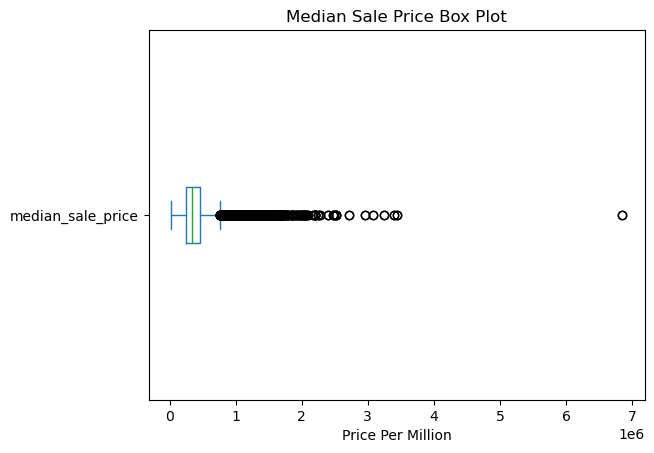

In [112]:
# import proper package
import matplotlib.pyplot as plt

# create plot
df_w["median_sale_price"].plot(kind="box", vert=False)
plt.title("Median Sale Price Box Plot")
plt.xlabel("Price Per Million")

plt.show;

In [114]:
# calculate the outlier values
q1 = np.percentile(df_w["median_sale_price"], 25, axis=0)
q3 = np.percentile(df_w["median_sale_price"], 75, axis=0)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
outliers = np.logical_or(df_w["median_sale_price"] > upper_whisker, df_w["median_sale_price"] < lower_whisker)

In [115]:
# sum of outliers
outliers.sum()

991

The above Plot shows there are a fair amout of outlisers, we calculated there are 991

I don't want to remove that many because that is a fair amount of data I belive is still worth while

We will remove only the outliers that are 3 standard deviations away from the mean

These are true outliers, and should be not as harsh as what was just calculated 

In [60]:
# calculate outliers based on standard deviation
mean = np.mean(df_w["median_sale_price"], axis=0)
std = np.std(df_w["median_sale_price"], axis=0)
outliers = np.logical_or(df_w["median_sale_price"] > mean + 3 * std, df_w["median_sale_price"] < mean - 3 * std)

In [61]:
# sum of outliers
outliers.sum()

386

We can see there are 386 outliers, we will remove them from our dataframe

In [70]:
# import prooper package
from scipy import stats

df_no_outliers = df_w[(np.abs(stats.zscore(df_w['median_sale_price'])) < 3)]


In [117]:
# sanity
print(df_w.shape)
print(df_no_outliers.shape)
print(df_w.shape[0]-df_no_outliers.shape[0])

(27512, 93)
(27126, 93)
386


Lets take a look at the box plot now

Text(0.5, 0, 'Price Per Million')

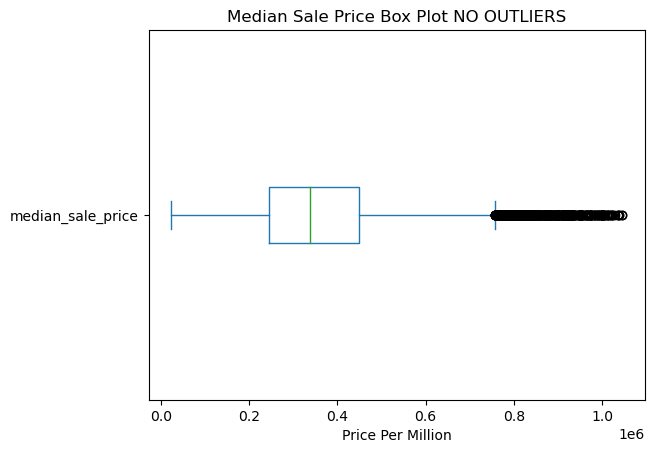

In [120]:
df_no_outliers["median_sale_price"].plot(kind="box", vert=False)
plt.title("Median Sale Price Box Plot NO OUTLIERS")
plt.xlabel("Price Per Million")

It seems a bit more fair, lets start modelling with this data

## MODELING AND HYPERPARAMETER TUNING

We are going to work with just Random Forest and Laso Regression, fine tune them, and see which works best

In [76]:
x = df_no_outliers.drop(columns="median_sale_price")
y = df_no_outliers["median_sale_price"]

In [77]:
from sklearn.model_selection import cross_val_score, train_test_split
# Split your data into a training set and a test set, stratifying on the y column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [87]:
# this is for laso
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### RandomForestRegressor

In [147]:
# Create a RandomForestRegressor mode
RF_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
RF_model_fit = RF_model.fit(x_train, y_train)

# Evaluate the model performance
print(f"train score {RF_model_fit.score(x_train, y_train)}")
print(f"test score {RF_model_fit.score(x_test, y_test)}")

train score 0.9786823595767673
test score 0.8492273719033913


The model looks to be functioning better with a train of .98 and a test of .85

What do we get when we try cross validation though?

In [158]:
# Define your model
RF_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
RF_model.fit(x_train, y_train)

# Perform 5-fold cross-validation on the test data
scores_train = cross_val_score(RF_model, x_train, y_train, cv=5)
scores_test = cross_val_score(RF_model, x_test, y_test, cv=5)


# Print the cross-validation scores
print("train Cross-validation scores:", scores_train)
print("train Mean cross-validation score:", scores_train.mean())
print("test Cross-validation scores:", scores_test)
print("test Mean cross-validation score:", scores_test.mean())

train Cross-validation scores: [0.81282887 0.8301218  0.82667807 0.83825876 0.82739445]
train Mean cross-validation score: 0.8270563903426547
test Cross-validation scores: [0.72457363 0.78382407 0.72406854 0.75735368 0.73436375]
test Mean cross-validation score: 0.7448367312972181


We see a train score of .83 and a test score of .74

train score went up by .01 and test went up by .04

The overfitting went down just a bit, while increasing both train and test scores

Lets see if we can adjust any hyper parameters to make the model better

We will first look at max depth

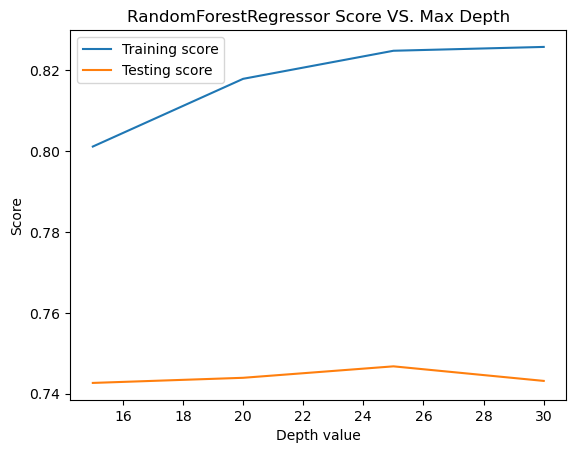

In [130]:
# Define range of alpha values to test
depths = [15,20,25,30]

# Create empty lists to store scores
train_scores = []
test_scores = []

# Loop through different alpha values
for depth in depths:
    # Define your model
    RF_model = RandomForestRegressor(max_depth=depth, random_state=42)

    # Fit the model to the training data
    RF_model.fit(x_train, y_train)

    # Perform 5-fold cross-validation on the test and train data
    scores_train = cross_val_score(RF_model, x_train, y_train, cv=5)
    scores_test = cross_val_score(RF_model, x_test, y_test, cv=5)

    # Append train_scores and test_scores
    train_scores.append(scores_train.mean())
    test_scores.append(scores_test.mean())

# Plot the results
plt.plot(depths, train_scores, label="Training score")
plt.plot(depths, test_scores, label="Testing score")
plt.xlabel("Depth value")
plt.ylabel("Score")
plt.title("RandomForestRegressor Score VS. Max Depth")
plt.legend()
plt.show()

We started with a max Depth set to 15

The plot above shows if we increase the depth, it will increase our training, up until a point, but our testing doesn't really improve at all

We will keep this set to 15 for now

Lets see what would happen if we change the min_samples_split

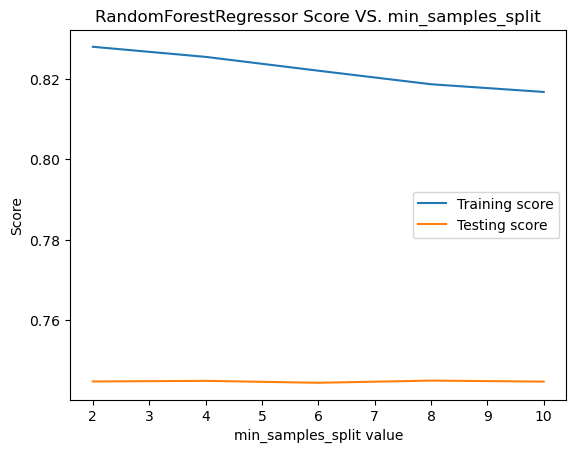

In [142]:
# Define range of alpha values to test
splits = [2,4,6,8,10]

# Create empty lists to store scores
train_scores = []
test_scores = []

# Loop through different alpha values
for split in splits:
    # Define your model
    RF_model = RandomForestRegressor(min_samples_split=split, random_state=42)

    # Fit the model to the training data
    RF_model.fit(x_train, y_train)

    # Perform 5-fold cross-validation on the test and train data
    scores_train = cross_val_score(RF_model, x_train, y_train, cv=5)
    scores_test = cross_val_score(RF_model, x_test, y_test, cv=5)

    # Append train_scores and test_scores
    train_scores.append(scores_train.mean())
    test_scores.append(scores_test.mean())

# Plot the results
plt.plot(splits, train_scores, label="Training score")
plt.plot(splits, test_scores, label="Testing score")
plt.xlabel("min_samples_split value")
plt.ylabel("Score")
plt.title("RandomForestRegressor Score VS. min_samples_split")
plt.legend()
plt.show()

We can see as the minimum number of samples required to split the internal node in the tree increases, our training score decreases, but jest ever so slightly that this change would not effect the model too much. 

This would increase accuracy, but only slightly

Lets take a look at the min_samples_leaf

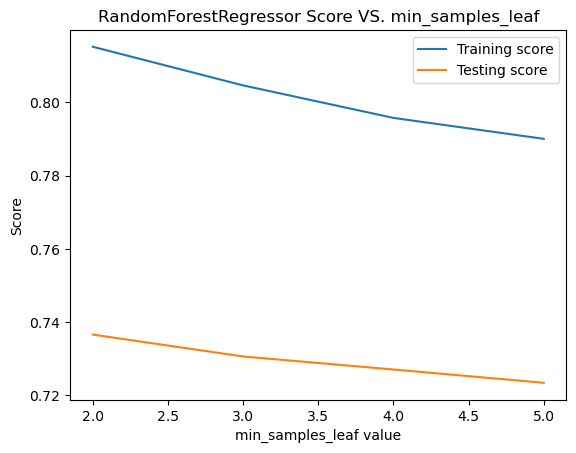

In [143]:
# Define range of alpha values to test
splits = [2,3,4,5]

# Create empty lists to store scores
train_scores = []
test_scores = []

# Loop through different alpha values
for split in splits:
    # Define your model
    RF_model = RandomForestRegressor(min_samples_leaf=split, random_state=42)

    # Fit the model to the training data
    RF_model.fit(x_train, y_train)

    # Perform 5-fold cross-validation on the test and train data
    scores_train = cross_val_score(RF_model, x_train, y_train, cv=5)
    scores_test = cross_val_score(RF_model, x_test, y_test, cv=5)

    # Append train_scores and test_scores
    train_scores.append(scores_train.mean())
    test_scores.append(scores_test.mean())

# Plot the results
plt.plot(splits, train_scores, label="Training score")
plt.plot(splits, test_scores, label="Testing score")
plt.xlabel("min_samples_leaf value")
plt.ylabel("Score")
plt.title("RandomForestRegressor Score VS. min_samples_leaf")
plt.legend()
plt.show()

The min_samples_leaf was set to 2 initially

We can see as it increases, both the score of the train and test decrease

We will definately keep this at 2

The final parameter we will look at is max_features

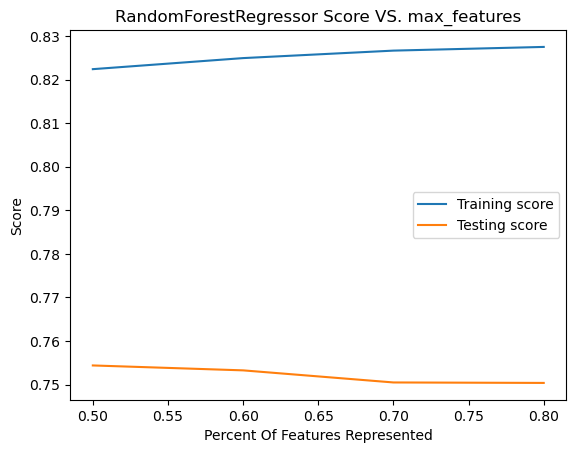

In [144]:
# Define range of alpha values to test
features = [.5,.6,.7,.8]

# Create empty lists to store scores
train_scores = []
test_scores = []

# Loop through different alpha values
for feature in features:
    # Define your model
    RF_model = RandomForestRegressor(max_features=feature, random_state=42)

    # Fit the model to the training data
    RF_model.fit(x_train, y_train)

    # Perform 5-fold cross-validation on the test and train data
    scores_train = cross_val_score(RF_model, x_train, y_train, cv=5)
    scores_test = cross_val_score(RF_model, x_test, y_test, cv=5)

    # Append train_scores and test_scores
    train_scores.append(scores_train.mean())
    test_scores.append(scores_test.mean())

# Plot the results
plt.plot(features, train_scores, label="Training score")
plt.plot(features, test_scores, label="Testing score")
plt.xlabel("Percent Of Features Represented")
plt.ylabel("Score")
plt.title("RandomForestRegressor Score VS. max_features")
plt.legend()
plt.show()

We can see above by increasing the features actually makes the training score go up, and the test score go down. 

It's by less than a percent each, but this does show that we only need 50 percent of our data to accurately predict pricing.

Doing this however could effect the overall future predictions becuase it is most likely removing cities from our data, meaning that if someone from a certain city wants to use this model, they would not be able to.

That being said, this model also shows that that maybe those cities don't provide enough information anyways to accurately predict them.

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define the model 
RF_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
RF_model.fit(x_train, y_train)

# Make predictions on the training and testing data
y_train_pred = RF_model.predict(x_train)
y_test_pred = RF_model.predict(x_test)

# Calculate the evaluation metrics on the training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate the evaluation metrics on the testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics and cross-validation scores
print(f"Mean Absolute Error (MAE):\n  Training: {mae_train:.2f}\n  Testing: {mae_test:.2f}\n")
print(f"Mean Squared Error (MSE):\n  Training: {mse_train:.2f}\n  Testing: {mse_test:.2f}\n")
print(f"Root Mean Squared Error (RMSE):\n  Training: {rmse_train:.2f}\n  Testing: {rmse_test:.2f}\n")
print(f"R-squared (R2) score:\n  Training: {r2_train:.2f}\n  Testing: {r2_test:.2f}")

Mean Absolute Error (MAE):
  Training: 14296.06
  Testing: 38220.89

Mean Squared Error (MSE):
  Training: 547957840.54
  Testing: 3793408607.58

Root Mean Squared Error (RMSE):
  Training: 23408.50
  Testing: 61590.65

R-squared (R2) score:
  Training: 0.98
  Testing: 0.85



In the above we calculated the a different forms of errors to interprate the model

- MAE
- MSE
- RMSE

we will look into this more when comparing it to lasso

### Lasso

I'm first going to calculate the best alpha hyper parameter for he current model

In [89]:
# Define the parameter grid to search over
parameters = {'alpha':np.logspace(-4,4,9)}

# Create a Lasso regression model
lasso_cv = GridSearchCV(Lasso(), parameters)

# Fit the GridSearchCV object to the data
lasso_cv.fit(x_train, y_train)

print(lasso_cv.best_params_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+12, tolerance: 4.470e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.424e+12, tolerance: 4.448e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.609e+12, toleranc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+12, tolerance: 4.477e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+12, tolerance: 4.470e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e+12, toleranc

{'alpha': 10.0}


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+12, tolerance: 5.578e+10
  model = cd_fast.enet_coordinate_descent(


We will et the alpha to ten and run the laso regression

In [90]:
# Create a Lasso regression model
lasso_cv = Lasso(alpha=10)

# Fit the GridSearchCV object to the data
lasso_cv.fit(x_train, y_train)

# score
scores_train = lasso_cv.score(x_train, y_train)
scores_test = lasso_cv.score(x_test, y_test)

# Score on the training data 
print(f"train score {scores_train}")

# Score on the testing data
print(f"test score {scores_test}")

train score 0.7620418808369693
test score 0.7575317918939865


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+12, tolerance: 5.578e+10
  model = cd_fast.enet_coordinate_descent(


We can see that this model is well fit, with a train of .762 and a test of .757

Lets try a cross train validation on it to see how reliable this is

In [145]:
# Create a Lasso regression model
lasso_cv = Lasso(alpha=10)

# Fit the GridSearchCV object to the data
lasso_cv.fit(x_train, y_train)

# Perform 5-fold cross-validation on the test and train data
scores_train = cross_val_score(lasso_cv, x_train, y_train, cv=5)
scores_test = cross_val_score(lasso_cv, x_test, y_test, cv=5)

# Score on the training data 
print(f"train score {scores_train.mean()}")

# Score on the testing data
print(f"test score {scores_test.mean()}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+12, tolerance: 5.578e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+12, tolerance: 4.470e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.484e+12, toleranc

train score 0.7586796551776537
test score 0.7502481013320882


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.214e+11, tolerance: 1.078e+10
  model = cd_fast.enet_coordinate_descent(


We can see the number stay around the same with the train being .759 and the test being .75

The scores did both go down, and the percent change increased, but the increase is so small, .004

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a Lasso regression model
lasso_cv = Lasso(alpha=10)

# Fit the GridSearchCV object to the data
lasso_cv.fit(x_train, y_train)

# Get the predicted values for the training and testing data
y_train_pred = lasso_cv.predict(x_train)
y_test_pred = lasso_cv.predict(x_test)

# Calculate the mean absolute error for the training and testing data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the mean squared error for the training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the root mean squared error for the training and testing data
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate the R2 score for the training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the error metrics
print("Mean Absolute Error (MAE):")
print(f"  Training: {mae_train:.2f}")
print(f"  Testing: {mae_test:.2f}")
print("Mean Squared Error (MSE):")
print(f"  Training: {mse_train:.2f}")
print(f"  Testing: {mse_test:.2f}")
print("Root Mean Squared Error (RMSE):")
print(f"  Training: {rmse_train:.2f}")
print(f"  Testing: {rmse_test:.2f}")
print("R-squared (R2) score:")
print(f"  Training: {r2_train:.2f}")
print(f"  Testing: {r2_test:.2f}")


Mean Absolute Error (MAE):
  Training: 53584.20
  Testing: 53161.28
Mean Squared Error (MSE):
  Training: 6116578313.90
  Testing: 6100450720.44
Root Mean Squared Error (RMSE):
  Training: 78208.56
  Testing: 78105.38
R-squared (R2) score:
  Training: 0.76
  Testing: 0.76


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+12, tolerance: 5.578e+10
  model = cd_fast.enet_coordinate_descent(


Lets take a look at all the errors side by side, comparing Laso and the Random Forest

| Metric | Training (Laso) | Testing (Laso) | Training (Random Forest) | Testing (Random Forest) |
| ------ | ------------------ | ------------------ | -------------- | ------------- |
| MAE    | 53584.20           | 53161.28          | 14296.06      | 38220.89      |
| MSE    | 6116578313.90      | 6100450720.44     | 547957840.54  | 3793408607.58 |
| RMSE   | 78208.56           | 78105.38          | 23408.50      | 61590.65      |
| R2     | 0.76               | 0.76              | 0.98          | 0.85          |

Looking at this data really shows that we only need to focus on mean absolute error.

This is telling us plus our minus how much our predictions are off.

For determining average home prices, this is the only statistic we really need.

We have been using R squared for just determining if testing accuracy fits with our training.

Although we can see for Laso we get pretty good accuracy when comparing both training and testing, the mean absolute error is fairly higher than the ones representing the Random Forest.

It's for this reason the best model for us would be the Random Forest.

## FEATURE IMPORTANCE

We are going to look at the individual features in our Random Forest Regression, and see which ones carried the most wait when determining the `median_sale_price`

In [159]:
# Create a RandomForestRegressor mode
RF_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
RF_model_fit = RF_model.fit(x_train, y_train)

# Evaluate the model performance
print(f"train score {RF_model_fit.score(x_train, y_train)}")
print(f"test score {RF_model_fit.score(x_test, y_test)}")

train score 0.9786823595767673
test score 0.8492273719033913


In [163]:
importances = RF_model_fit.feature_importances_

# get the feature names
feature_names = x.columns

# create an empty list to store tuples of (feature name, importance)
feature_importances = []

# iterate over the feature names and importances and append them to the list
for feature_name, importance in zip(feature_names, importances):
    feature_importances.append((feature_name, importance))

In [164]:
# sanity
feature_importances

[('median_list_price', 0.45996891193618056),
 ('median_list_ppsf', 0.05267517282225462),
 ('homes_sold', 0.023318725237025443),
 ('inventory', 0.026208640381306898),
 ('median_dom', 0.03348729887392251),
 ('All Residential', 0.001761233119165235),
 ('Condo/Co-op', 0.1561763661405682),
 ('Multi-Family (2-4 Unit)', 0.004699844506642093),
 ('Single Family Residential', 0.001722748956599067),
 ('Townhouse', 0.046635292674948994),
 ('Aloha', 0.0004483669202027228),
 ('Amity', 0.003148460470936651),
 ('Banks', 0.0015265989763710674),
 ('Barlow', 0.00045876321491401426),
 ('Beavercreek', 0.001981461842128847),
 ('Beaverton', 0.0007994577489606289),
 ('Bethany', 0.0011039127751299171),
 ('Boring', 0.001769464068189304),
 ('Bull Mountain', 0.00043314039065068437),
 ('Canby', 0.0003770277534028225),
 ('Carlton', 0.0005407592537032209),
 ('Cedar Hills', 0.0003117243996864209),
 ('Cedar Mill', 0.0020655134325889978),
 ('Cherry Grove', 0.002159217552152914),
 ('Clackamas', 0.0005874041275843754),
 

In [173]:
# change to pandas dataframe
fi = pd.DataFrame(feature_importances)
fi = fi.rename(columns={0: 'Feature', 1: 'Importance'})

In [216]:
# sorting and filtering top 10 features
top_10 = fi.sort_values("Importance", ascending = False).head(10)

In [217]:
top_10

,Feature,Importance
0,median_list_price,0.459969
6,Condo/Co-op,0.156176
90,year_begin,0.070981
1,median_list_ppsf,0.052675
9,Townhouse,0.046635
4,median_dom,0.033487
3,inventory,0.026209
2,homes_sold,0.023319
91,month_begin,0.017207
69,Rivergrove,0.006596


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


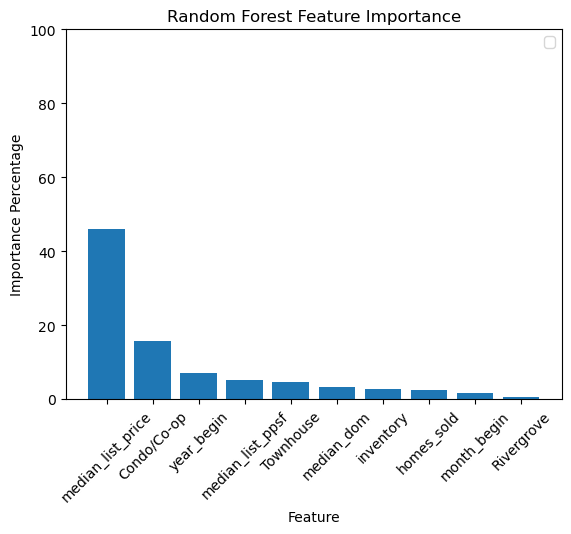

In [238]:
# defining top 10 features and importance
feature = top_10["Feature"]
importance = top_10["Importance"]*100

# creating a bar chart
plt.bar(feature, importance)
plt.xlabel("Feature")
plt.ylabel("Importance Percentage")
plt.title("Random Forest Feature Importance")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Notes
1 remove outliers

2 check RFR hyperparam

3 metrics (MAE, rel error, etc.)

4 Business story $$$$

5 DS story (model, feature import, next things)

feature permutation in sklearn for feature importance


histogram of errors (predicted values vs target)


residuals vs. fitted values plot
